In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
# https://www.kaggle.com/datasets/dinaouahbi/telecust
df = pd.read_csv('./../data/telecust1000t.csv')

In [27]:
df.sample(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
30,1,56,37,1,6,36.0,1,13,0.0,1,2,2
923,2,69,47,1,10,159.0,2,24,0.0,0,4,3
321,1,37,51,1,15,54.0,1,15,0.0,0,3,3
719,2,19,32,0,12,71.0,4,5,0.0,1,1,4
525,3,55,52,0,22,127.0,1,28,0.0,1,3,2


Text(0, 0.5, 'Count')

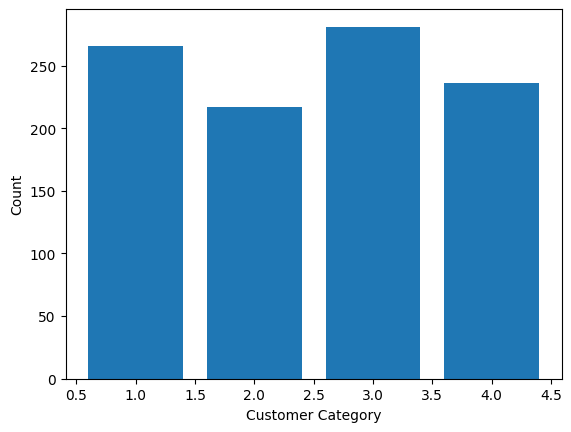

In [28]:
plt.bar(df['custcat'].value_counts().index, df['custcat'].value_counts())
plt.xlabel('Customer Category')
plt.ylabel('Count')

In [29]:
df.corr()['custcat'].sort_values(ascending=False)

custcat    1.000000
ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
retire     0.008908
gender    -0.004966
region    -0.023771
Name: custcat, dtype: float64

<Axes: >

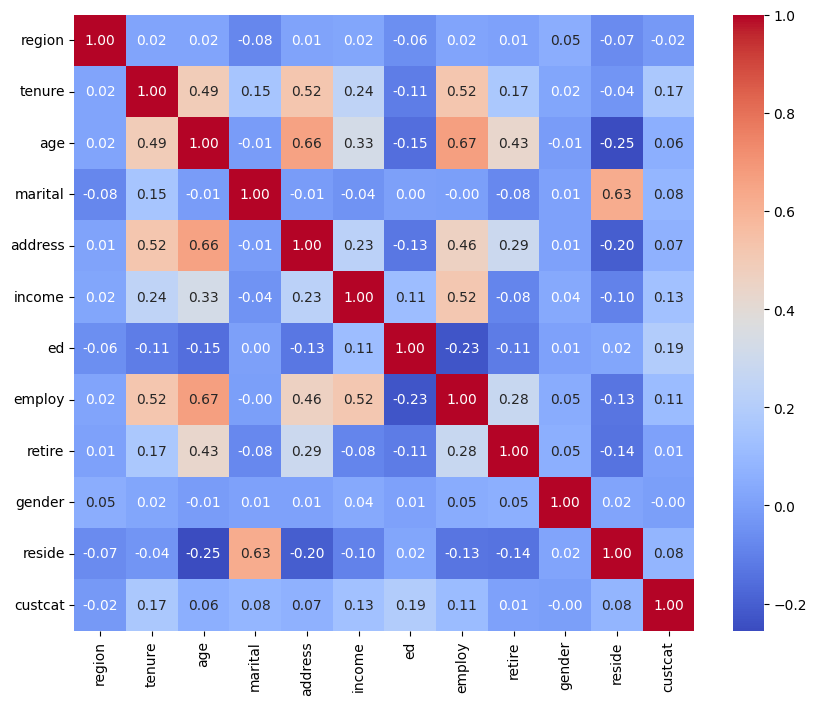

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [31]:
X = df.drop(['custcat'], axis=1)
y = df['custcat']

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.33
